# Notebook to process loss data 

So we can plot and stuff

## Serial 

In [5]:
import numpy as np
from matplotlib import pyplot as plt

In [6]:
import re

# Define the path to your log file
log_file_path = 'ml_serial.out'

# Regular expression to match lines with the loss number
pattern = re.compile(r"Loss: ([\d.]+)")
pattern_test = re.compile(r"Test set: Average loss: ([\d.]+)")

# List to hold all the extracted loss numbers
loss_numbers_reg_sing = []
test_numbers_reg_sing = []

# Open the log file and parse it
with open(log_file_path, 'r') as file:
    for line in file:
        match = pattern.search(line)
        if match:
            # Extract the loss number and convert it to float
            loss_number = float(match.group(1))
            loss_numbers_reg_sing.append(loss_number)
        match = pattern_test.search(line)
        if match:
            # Extract the loss number and convert it to float
            loss_number = float(match.group(1))
            test_numbers_reg_sing.append(loss_number)
loss_numbers_reg_sing = np.array(loss_numbers_reg_sing)
test_numbers_reg_sing = np.array(test_numbers_reg_sing)

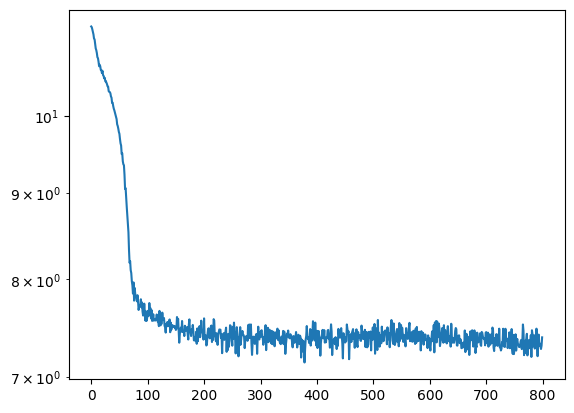

In [8]:
plt.semilogy(loss_numbers_reg_sing)

## Multi - contains two different runs

1. First run multi-level in (2, 2) and second run (3, 3)
2. Iterations: 2 forward in each, 1 backward in each.
3. Need to parse whever split 

In [20]:
# Define the path to your log file
log_file_path = 'ml_multi_2.out'

# Regular expression to match lines with the loss number
pattern = re.compile(r"Loss: ([\d.]+)")
pattern_test = re.compile(r"Test set: Average loss: ([\d.]+)")

# List to hold all the extracted loss numbers
loss_numbers_reg_22 = []
test_numbers_reg_22 = []
loss_numbers_reg_33 = []
test_numbers_reg_33 = []

# Open the log file and parse it
with open(log_file_path, 'r') as file:
    for line in file:
        match = pattern.search(line)
        if match:
            # Extract the loss number and convert it to float
            loss_number = float(match.group(1))
            loss_numbers_reg_22.append(loss_number)
        match = pattern_test.search(line)
        if match:
            # Extract the loss number and convert it to float
            loss_number = float(match.group(1))
            test_numbers_reg_22.append(loss_number)

loss_numbers_reg_33 = np.array(loss_numbers_reg_22[800:])
test_numbers_reg_33 = np.array(test_numbers_reg_22[5:])

loss_numbers_reg_22 = np.array(loss_numbers_reg_22[0:800])
test_numbers_reg_22 = np.array(test_numbers_reg_22[0:5])



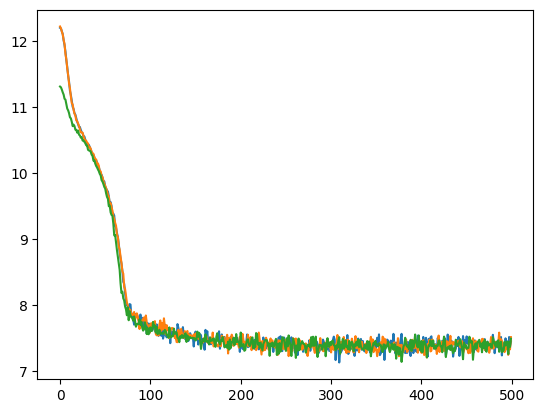

In [28]:
plt.plot(loss_numbers_reg_22[0:500])
plt.plot(loss_numbers_reg_33[0:500])
plt.plot(loss_numbers_reg_sing[0:500])

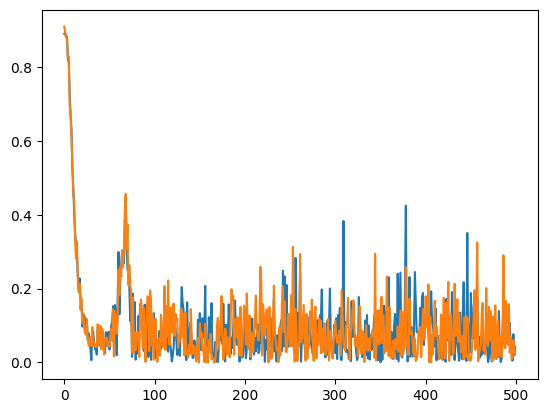

In [31]:
plt.plot(np.abs(loss_numbers_reg_sing[0:500] - loss_numbers_reg_22[0:500]))
plt.plot(np.abs(loss_numbers_reg_sing[0:500] - loss_numbers_reg_33[0:500]))
# plt.plot(loss_numbers_reg_sing[0:500])

In [32]:
serial_loss = loss_numbers_reg_sing[0:500]
parallel_loss = loss_numbers_reg_22[0:500]
parallel_loss_2 = loss_numbers_reg_33[0:500]

# Ensure both arrays have the same length
assert len(serial_loss) == len(parallel_loss), "Arrays must have the same length"
assert len(serial_loss) == len(parallel_loss_2), "Arrays must have the same length"

# # Save the data to a file
with open('loss_data.dat', 'w') as f:
    f.write("Batch Serial_Loss Parallel_Loss22 Parallel_Loss33\n")
    for i, (s_loss, p_loss, p_loss1) in enumerate(zip(serial_loss, parallel_loss, parallel_loss_2)):
        f.write(f"{i} {s_loss} {p_loss} {p_loss1}\n")

In [118]:
def makeKnot(n,order):
    o = order-1
    knots = np.linspace(0,1,n-2*o)
    dx = knots[1]-knots[0]
    
    return list(np.concatenate([knots[0:o]-o*dx,knots,knots[-o:]+o*dx],axis=0))


In [119]:
makeKnot(14 ,4)

[-0.42857142857142855,
 -0.2857142857142857,
 -0.14285714285714285,
 0.0,
 0.14285714285714285,
 0.2857142857142857,
 0.42857142857142855,
 0.5714285714285714,
 0.7142857142857142,
 0.8571428571428571,
 1.0,
 1.1428571428571428,
 1.2857142857142856,
 1.4285714285714286]

In [122]:
def myMakeKnot(n, order): 
    o = order - 1
    knots = np.zeros(n - 2 * o + 2 * o) # Use vec in C++
    knots[0] = 0
    dx = 1 / (n - 2 * o - 1)
    # Split into 3 for loops; easier done this way...
    for i in range(1, n - 2 * o):
        knots[o + i] = knots[o + i - 1] + dx
    for i in range(0, o):
        knots[o - i - 1] = knots[o - i] - dx
        knots[n - 2 * o + o + i] = knots[n - 2 * o + o + i - 1] + dx
    return knots

In [124]:

np.array(myMakeKnot(20, 5)) - np.array(makeKnot(20,5))

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.77555756e-17,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  1.11022302e-16,  1.11022302e-16,
        1.11022302e-16,  1.11022302e-16,  1.11022302e-16,  2.22044605e-16,
        2.22044605e-16,  0.00000000e+00, -2.22044605e-16, -2.22044605e-16])